In [98]:
!pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
     |████████████████████████████████| 7.3 MB 3.7 MB/s eta 0:00:01
  Using cached threadpoolctl-2.2.0-py3-none-any.whl (12 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1317 sha256=60f4d436dc3a6988273e308287714dc0c77cc1108c5fb4424c669ff5941ba421
  Stored in directory: /Users/spenno_fr/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [99]:
import pandas as pd
import numpy as np
import gensim
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pickle

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram

In [96]:
dft = pd.read_csv('250k_full_lda_185.csv')
dft['article_words'] = [eval(item) for item in dft['article_words']]

In [6]:
filename = 'models/7passes_265_topics_ldamodel.id2word'
file = open(filename,'rb')
id2word = pickle.load(file)

lda_model = gensim.models.ldamodel.LdaModel.load('models/7passes_265_topics_ldamodel')
                                                 
filename = 'models/topics_dict.pkl'
file = open(filename,'rb')
topics_dict = pickle.load(file)                                                                                                                                                  

In [7]:
tech_labels = ['robots & robotics','meat substitutes','tech m&a','laptops, mobile devices, gadgets','audio tech',
              'climate science','digital advertising','ridesharing services e-scooters & e-bikes',
               'wireless charging technology','e-commerce & online delivery','apple devices','astrophysics',
               'automotive technology1','virtual reality','audio streaming and apps','virtual assistants, smart home tech',
              'data breaches & data privacy','data protection & govt intervention','drones & unmanned aerial tech',
              '5g % mobile networks','autonomous vehicles1','hacks & data theft','astrophysics','battery technology',
              'tech investments, vc, new initiatives1','space exploration','cryptocurrency','cybersecurity',
               'gene editing, genetic engineering','cutting-edge mobile devices, gadgets','quantum computing',
               'fintech & payments','microsoft apps, os, devices','earth sciences','faang','climate science & technology',
               'meteorology','automotive technology2','tech investments, vc, new initiatives2','artificial intelligence',
               'chips & processors','astronomy & astrophysics','software/service glitches, bugs & outages',
               'tech investments, vc, new initiatives3','nuclear tech','aviation & aerospace','code & software',
               'satellites & rockets','dark web & online privacy','autonomous vehicles1','surveillance tech',
               'mobile networks, carriers & eqpt','space exploration','apps, gadgets & devices']

health_labels = ['drugs, clinical trials, approvals','intl big business','marijuana & CBD',
             'menstrual health','cancer treatments & trials','food poisoning, allergies, household chemicals',
            'health insurance & washington legislation','organ donation','livestock viral diseases','skincare',
            'food & diet','fitness, exercise & diet','mood disorders','product recalls','sleep health','infectious diseases',
            'big tech govt intervention','sexual assault & harassment','health aspects of body art',
            'infant nutrition','smoking, vaping & e-cigs','bloodborne diseases & vaccines','medical devices',
             'bacteria & viruses','the human brain','blood and blood diseases','sex and relationships','clinical care',
             'birth control & reproductive health',"children's health",'lgbtq issues','mental health & disorders',
             'prescription drugs']

tech_health_labels = tech_labels + health_labels

## Visualize 2

In [94]:
start = '2018-05-12'
end = '2018-05-12'

mini_df = dft[(dft['date'] >= start) & (dft['date'] <= end)]
mini_df.shape

NameError: name 'dft' is not defined

In [22]:
def dummy_func(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_func,
    preprocessor=dummy_func,
    token_pattern=None,
    max_df=0.8,
    min_df=3,
    use_idf=True,)  

tfidf_matrix = tfidf.fit_transform(mini_df['article_words'])

dist = 1 - cosine_similarity(tfidf_matrix)

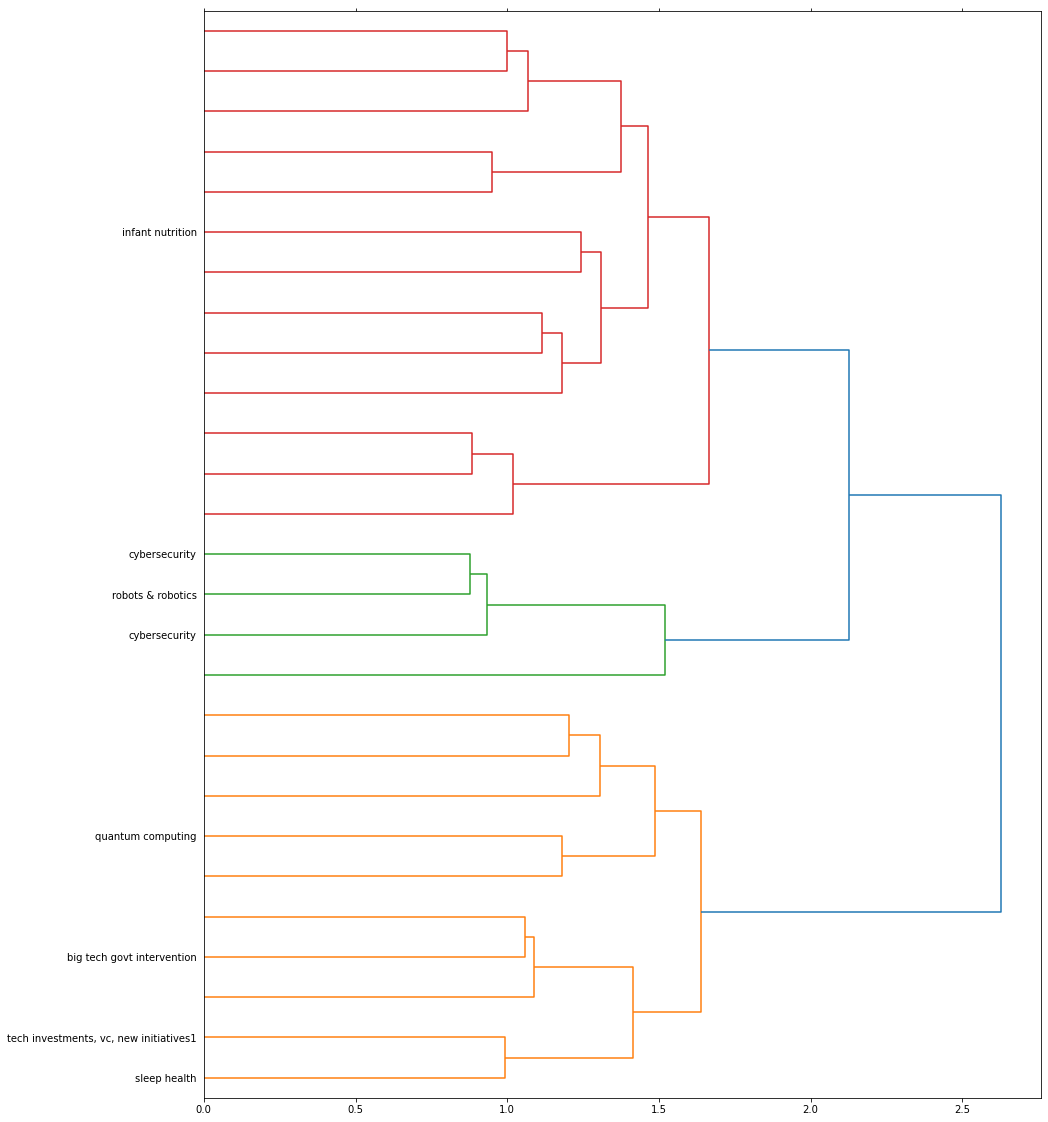

In [23]:
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size

lda_topics = [mini_df.iloc[i,14] for i in range(len(mini_df))]
label_names = [topics_dict[topic] for topic in lda_topics]
label_names = [label if label in tech_health_labels else '' for label in label_names]

ax = dendrogram(linkage_matrix, orientation="right", labels=label_names);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

#plt.tight_layout() #show plot with tight layout

In [2]:
import pickle
import pandas as pd

In [8]:
with open('/Users/spenno_fr/Projects/nlp-glg-mas/models/NER/0.1/' + '14passes_265_ents_dict(stripped_final_sep_14).pkl', 'rb') as file:
    ner_topic_dict = pickle.load(file)

In [11]:
ner_topic_dict[10]

{'French-gpe': 55,
 'Chinese-gpe': 30,
 'German-gpe': 20,
 'Indian-gpe': 15,
 'American-gpe': 14,
 'AT T-org': 138,
 'Justice Department-org': 55,
 'CNN-org': 47,
 'NXP-org': 45,
 'CBS-org': 45,
 'Time Warner-per': 81,
 'Qualcomm-per': 30,
 'T Mobile-per': 21,
 'Trump-per': 17,
 'Stephenson-per': 15,
 'Qualcomm-geo': 57,
 'Broadcom-geo': 51,
 'Viacom-geo': 43,
 'Cigna-geo': 30,
 'Comcast-geo': 27}

In [19]:
# ner_topic_df = pd.DataFrame(ner_topic_dict)

In [1]:
def unpack_top5_entities_per_topic(ner_topic_dict):
    
    # Copy the keys from the input dictionary to a new one for parsing into
    topic_to_top5_ner_entities = dict.fromkeys(ner_topic_dict.keys(), None)
    
    # Iterate through each topic number and append
    for topic_id in ner_topic_dict.keys(): 

        # Create a dictionary structure to hold the top 5 entities extracted within each topic
        ent_types_dict = {'org':[], 'geo':[], 'gpe':[], 'per':[], 'tim':[], 'art':[]}

        # Iterate through each entity type
        for ent_type in ent_types_dict.keys():

            # For a given entity type, find the top 5 entities
            ent_type_top_5 = [(key[:key.find(ent_type) - 1], value) for key, value in ner_topic_dict[topic_id].items() if key.find(ent_type) > 0]

            # Append to the entity_dictionary
            ent_types_dict[ent_type] = ent_types_dict[ent_type] + ent_type_top_5

        topic_to_top5_ner_entities[topic_id] = ent_types_dict
    
    # Return fully parsed topic_to_ner_dictionary
    return topic_to_top5_ner_entities

In [12]:
topic_to_top5_ner_entities = unpack_top5_entities_per_topic(ner_topic_dict)

In [15]:
# Write to pickle for loading in deployed app
with open('/Users/spenno_fr/Projects/nlp-glg-mas/models/NER/0.1/' + 'topic_to_top5_ner_entities_v0.1.pkl', 'wb') as file:
    pickle.dump(topic_to_top5_ner_entities, file, protocol=pickle.HIGHEST_PROTOCOL)

In [14]:
topic_to_top5_ner_entities[31]

{'org': [('Apple', 14141),
  ('Apple Watch', 902),
  ('Apple TV', 451),
  ('Bloomberg', 367),
  ('CNBC', 318)],
 'geo': [('China', 1074),
  ('Pro', 451),
  ('India', 351),
  ('Samsung', 261),
  ('United States', 226)],
 'gpe': [('Chinese', 377),
  ('American', 83),
  ('Indian', 81),
  ('Japanese', 37),
  ('French', 22)],
 'per': [('Cook', 796),
  ('Mac', 492),
  ('Trump', 275),
  ('Kuo', 259),
  ('Siri', 254)],
 'tim': [],
 'art': []}

In [ ]:
'One of the studies looked at more than 600,000 virus infections in 13 states, representing about one quarter of the U.S. population, between April and July. The researchers concluded that Americans who were not fully vaccinated were far more susceptible to infections, illness and death from the virus. Even after the Delta variant became dominant in the United States over the summer, the vaccines’ protections remained strong: Compared with vaccinated adults, those who were not fully vaccinated were 4.5 times as likely to become infected, 10 times as likely to be hospitalized and 11 times as likely to die of Covid.'

In [79]:
# Dump v1 topic_dict
topics_dict = {0:'ind',1:'sweden money-laundering',2:'libya politics',3:'gossip/celebrity life',4:'international business/economics',
			   5:'mideast oil/business',6:'us politics',7:'international energy/renewables',8:'vietnam',9:'activism/protests',
			   10:'nutrition/health science',11:'international diplomacy/politics',12:'washington politics',13:'celebrity life',
			   14:'ind',15:'immunology/bloodborne diseases',16:'german-language business',17:'islamic geopolitics',
			   18:'international oil/politics',19:'baseball/football',20:'art and museums',21:'international trade',
			   22:'travel and tourism',23:'defence/military',24:'movies/video clips',25:'defence/weapons tech',
			   26:'ind',27:'bankruptcy/corporate debt/m&a',28:'fashion',29:'heavy metals, minerals and mining',
			   30:'gossip/celebrity life',31:'intl govt/politics',32:'no topic',33:'urban/city life',34:'gossip/celebrity life',
			   35:'washington politics',36:'words and wordplay',37:'tax and tax policy',38:'ind',39:'beauty pageant',
			   40:'stock earnings reports',41:'us census/treasury',42:'french current affairs',43:'obama',44:'beauty & makeup',
			   45:'weather and natural disasters',46:None,47:'ind',48:'us politics',49:'showbiz awards',50:'global macroeconomics',
			   51:'charitable donations/campaign contributions',52:'cybersecurity/hacking',53:'ind',54:'combat sports',
			   55:None,56:'star wars franchise',57:'ugandan shilling',58:'sexual harrassment/assault',59:'consumer electronics',
			   60:'global banking',61:'global c-suite executive',62:'trump',63:'climate and severe weather',64:'festivals and special occasions',
			   65:'legal analysis',66:'immigration, refugees and asylum',67:'tech gadgets',68:'olympics',69:'wildfires/mexico politics',
			   70:'nissan',71:'horoscopes',72:'washington politics',73:'myanmar',74:None,75:'ind',76:'global banking',77:'tennis',
			   78:'telecommunications',79:'supreme court',80:None,81:'education',82:'rifles (russian language)',83:None,84:'ind',
			   85:'wellness, self-help, relationships',86:'ind',87:'us sports',88:'game of thrones',
			   89:'streaming/media svcs',90:'celebrities and sports stars',91:None,92:'gaming and VR',
			   93:'intl corporate earnings',94:'future-tech, AI and crypto',95:'conservative politics',
			   96:'Brazil business & politics',97:'tech vc, m&a, ipos, restructuring',98:'ind',99:'crimes/arrests',
			   100:'physical and mental health',101:'college admissions scandal',102:'coronavirus',
			   103:'international markets/monetary matters',104:'racing',105:'employment',106:'church and religion',
			   107:'mid-east - US relations',108:'guns/shootings',109:'elon musk',110:'regulation, laws, govt oversight',
			   111:'ind',112:'healthcare coverage/insurance',113:None,114:'social media providers',115:'sports',
			   116:'trump white house investigations',117:'industrial workers and unions',118:'washington politics',
			   119:'wildlife, aquatics and marine life',120:'ind',121:None,122:'stocks',123:'south american business',
			   124:'le culture francais',125:'south asian/African business/politics',126:'music',127:'russia politics',
			   128:'apps and mobile technology',129:'ind',130:'us/intl monetary policy',131:'jokes, parodies, trivia',
			   132:'north korea relations',133:'misc lists and trivia',134:'aviation and aerospace',135:'homes and real estate',
			   136:'espanol',137:'israeli-palestinian conflict',138:None,139:'celebs/reality tv stars',140:'astrophysics/space tech/sci fi',
			   141:None,142:'biotechnology & pharmaceuticals',143:'ind',144:'south africa',145:'climate & environmental issues',
			   146:'movies, tv, showbiz',147:'mobile devices, laptops, smart home tech',148:'performing arts',149:'ind',150:'celebrity hair & beauty',
			   151:'ind',152:'recreational & medical marijuana',153:'pets, animals',154:'cross-border trade',155:'reproduction and birth control',
			   156:'e-cigarettes, vaping and tobacco',157:'apple',158:'stock market & big business',159:'addiction and public health',
			   160:'agriculture & farming',161:'food and drink',162:'space & space travel',163:'international politics & finance',
			   164:'ind',165:'trump allies',166:'ind',167:'books, writing and writers',168:'politics & polls',169:'US elections',      
			   170:'UK/EU economics, politics',171:'healthcare, insurance & retirement benefits',172:'cuba',173:'snackfoods, desserts & beverages',
			   174:'misc lists and trivia',175:'desus & mero',176:'automakers & ride-sharing',177:'icebergs & glaciers',
			   178:'ice hockey',179:'global big business',180:'washington politics',181:'China/HK business',182:'LGBTQ matters',
			   183:'royalty and monarchy', 184:'retail'}

In [80]:
# Write to pickle for loading in deployed app
with open('/Users/spenno_fr/Projects/nlp-glg-mas/models/LDA/0.1/topic_mapping/' + 'topics_dict_v0.1.pkl', 'wb') as file:
    pickle.dump(topics_dict, file, protocol=pickle.HIGHEST_PROTOCOL)

In [89]:
# Write to pickle for loading in deployed app
with open('/Users/spenno_fr/Projects/nlp-glg-mas/models/LDA/0.3/topic_mapping/' + 'topics_dict_v0.3.pkl', 'rb') as new_file:
    topics_dict_v3 = pickle.load(new_file)

In [85]:
!pwd

/Users/spenno_fr/Projects/nlp-glg-mas/notebooks


In [87]:
!ls '/Users/spenno_fr/Projects/nlp-glg-mas/models/LDA/0.3/topic_mapping/'

topics_dict_v0.3.pkl


In [92]:
topics_dict_v3

{0: 'Mexican Telecommunications',
 1: 'Education & Student Life',
 2: '',
 3: 'International Big Business',
 4: 'Drugs, Clinical Trials, Approvals',
 5: 'Robots & Robotics',
 6: 'Indian Tech & Business',
 7: 'Meat Substitutes',
 8: 'Fish',
 9: 'Israeli Tech & Business',
 10: 'Tech M&A',
 11: '',
 12: 'Vacation Rental',
 13: 'Laptops, Mobile Devices, Gadgets',
 14: 'Audio Tech',
 15: 'Climate Science',
 16: 'International Govt Relations',
 17: 'Digital Advertising',
 18: '',
 19: 'Marijuana & CBD',
 20: 'Ridesharing Services, E-Scooters & E-Bikes',
 21: '',
 22: 'Wireless Charging Technology',
 23: 'Diversity & Discrimination',
 24: 'Basketball',
 25: 'Mass Transit',
 26: 'E-Commerce & Online Delivery',
 27: 'European Alternative Energy',
 28: 'Menstrual Health',
 29: 'Cancer Treatments & Trials',
 30: '',
 31: 'Apple Devices',
 32: 'Motor Racing',
 33: 'Food Poisoning, Allergies, Household Chemicals',
 34: 'Health Insurance & Washington Legislation',
 35: 'Asian Business',
 36: 'Astrop